<a href="https://colab.research.google.com/github/gitboku/statistics-practice/blob/master/%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 重回帰分析とは何か

参考：　https://to-kei.net/basic-study/regression/multiple-regression-analysis/

成人の身長を例にする。

身長を目的変数を$y$、体重と年齢を説明変数$x_1, x_2$とする。  
すると、以下のようにあらわせる。

$$
y = a_1x_1 + a_2x_2 + b
$$

$a$は偏回帰係数と呼ばれ、$a_i$は最小二乗法によって求められる。

## 標準化偏回帰係数

標準化偏回帰係数とは各変数の重要度を表す指標であり、大小を比較することでどの変数が重要なのかを測る。  
例えば、体重を㎏でデータを取得した時と、ｇで取得した時では偏回帰係数に1000倍の差が出てしまうが、標準化偏回帰係数なら単位に関わらず各説明変数の影響の大きさを測ることができる。

目的変数yの標準偏差を$SD(y)$、説明変数xの標準偏差を$SD(x)$とすると、標準化偏回帰係数Aは以下のようにあらわす。

$$
A_i = a_i\frac {SD(x_i)} {SD(y)}
$$

## ダミー変数

「性別」のような数字で表せないカテゴリー変数を{0, 1}に変換したものをダミー変数という。  
2種類の値を持つデータ（例えば男と女）では0または1で表す。  
3変数以上の場合は変数n個に対してn-1個の列を用いることで表せる。  
例えば、｛白人、黒人、アジア人｝の3つの値を取るときは、「白人」「黒人」の二つの列を用意し、「両方0ならアジア人」というようにして表す。

## 説明変数を選ぶ注意点



*   説明変数同士の相関係数は低く抑える。
*   現在のデータに対する説明力を考えるときは決定係数を、新たなデータに対する予測力を考えるときはAIC（赤池情報量基準）を用いるといい。



## 決定係数

パラメータ推定に使用したデータに対して推定された回帰式の当てはまりの良さを表す。  
「寄与率」ともいう。  
一般には$R^2$で表され、回帰変動$S_R$を全体変動$S_T$で割った値である。  
0から1の値を取り、1に近いほどデータに当てはまっている。

$$
\begin{eqnarray}
R^2 &=& \frac{S_R}{S_T}\\
S_R &=& \displaystyle \sum_{i = 1}^n {\left(\hat{y}_i - \overline{y} \right)}^2\\
S_T &=& \displaystyle \sum_{i = 1}^n {\left(y_i - \overline{y} \right)}^2 
\end{eqnarray}
$$

$\hat{y}_i$は回帰式から推定されたデータで、$y_i$は実際のデータ。

重回帰分析では変数が増えるほど無条件で1に近づいてしまうので、代わりに「自由度修正済み決定係数」を使用する。

## 自由度調整済み決定係数

$R_f^2$で表す。  
データ数をN、説明変数の数をpとすると、以下のようになる。

$$
R_f^2 = 1 - \frac{\frac {S_R} {N - p - 1}}{\frac {S_T} {N - 1}}
$$

このほかにAIC（赤池情報量基準）を用いてもよい。

# どのようにしてパラメータを求めるのか

基本的には単回帰分析と同じなので省略

# 実装

In [0]:
import numpy as np
import pandas as pd

## データ用意

In [0]:
# 元からあったsample_dataを使用する
csv = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [3]:
csv.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [0]:
households = csv['households']
population = csv['population']
total_rooms = csv['total_rooms']

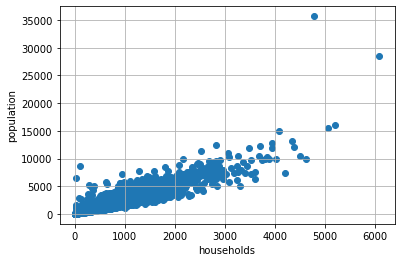

In [6]:
from matplotlib import pyplot

pyplot.scatter(households, population)
pyplot.xlabel("households")
pyplot.ylabel("population")
pyplot.grid(True)
pyplot.show()

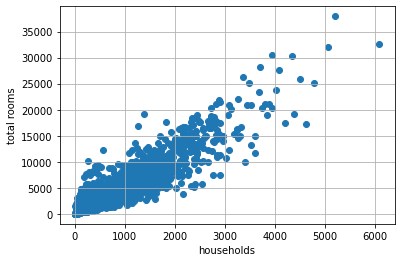

In [7]:
pyplot.scatter(households, total_rooms)
pyplot.xlabel('households')
pyplot.ylabel('total rooms')
pyplot.grid()
pyplot.show()

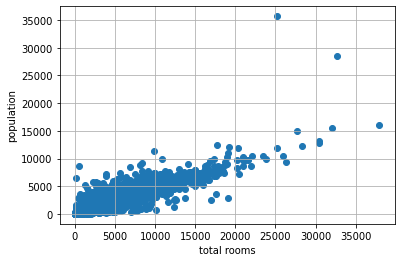

In [8]:
pyplot.scatter(total_rooms, population)
pyplot.xlabel('total rooms')
pyplot.ylabel('population')
pyplot.grid()
pyplot.show()

In [0]:
# さしあたり、目的変数をpopulation、説明変数をtotal_roomsとhouseholdsとする。